In [1]:
!curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/incident_reports.csv > data/incident_reports.csv   
!curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/districts.csv > data/districts.csv    

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.1M  100 19.1M    0     0  1186k      0  0:00:16  0:00:16 --:--:-- 1211k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   498  100   498    0     0   2040      0 --:--:-- --:--:-- --:--:--  2040


In [2]:
from data import load_data_viz_data
import pandas as pd
data = load_data_viz_data()
data[['LAT','LONG']] = data[['LAT','LONG']].astype('float64')
print("Shape of the DataFrame:", data.shape)
data.head()

Shape of the DataFrame: (237221, 9)


,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
4,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359


In [3]:
most_common_incidents_df = data.copy()
most_common_incidents_df = most_common_incidents_df.groupby(['NAME'])['OFFENSE_CODE_GROUP'].agg(pd.Series.mode).to_frame()
most_common_incidents_df.reset_index()
most_common_incidents_df

,OFFENSE_CODE_GROUP
NAME,
Brighton,Larceny and vandalism
Charlestown,Larceny and vandalism
Dorchester,Larceny and vandalism
Downtown,Larceny and vandalism
East Boston,Larceny and vandalism
Hyde Park,Larceny and vandalism
Jamaica Plain,Larceny and vandalism
Mattapan,Police investigation procedure
Roxbury,Larceny and vandalism


In [ ]:
g = sns.FacetGrid()

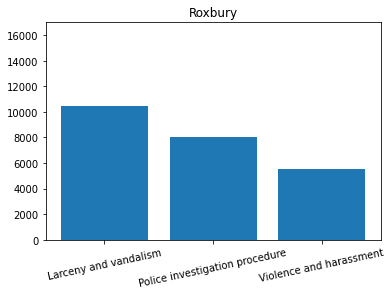

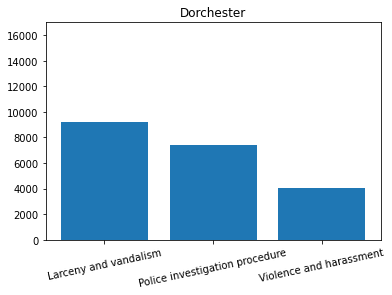

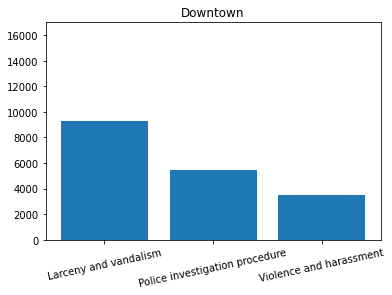

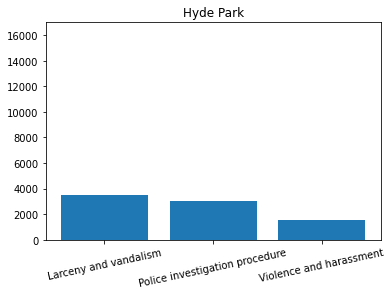

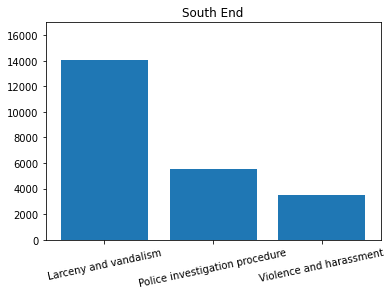

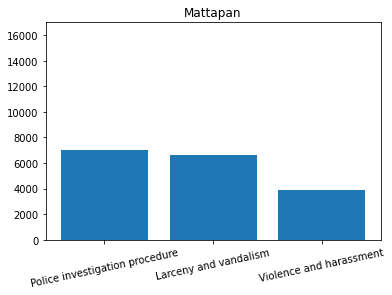

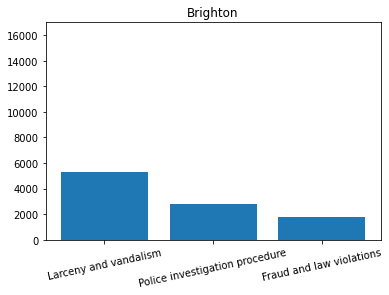

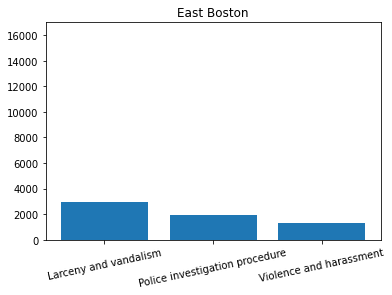

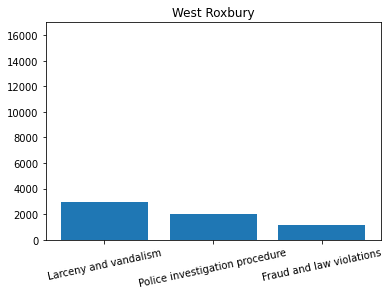

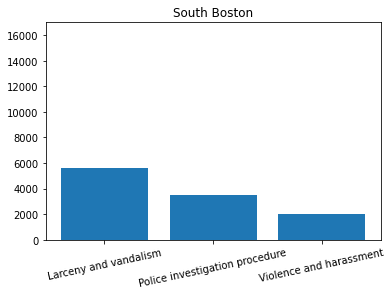

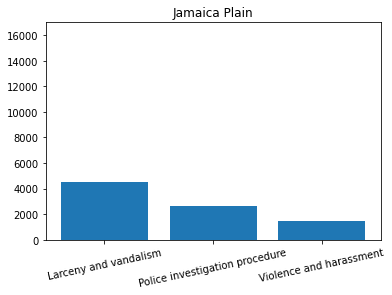

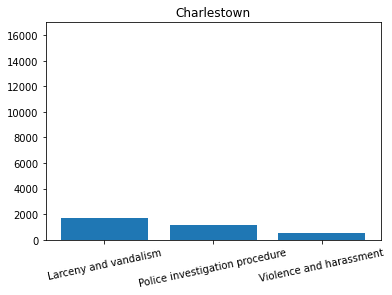

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

for name in data['NAME'].unique():
    plt.figure()
    tmp = data[data['NAME']==name]
    tmp = tmp['OFFENSE_CODE_GROUP'].value_counts().to_frame().reset_index().iloc[0:3,]
    plt.bar(tmp['index'], tmp['OFFENSE_CODE_GROUP'])
    plt.ylim(0,17000)
    plt.xticks(rotation=12)
    plt.title(name)
    

In [5]:
offenses_counts = data.groupby('NAME')['OFFENSE_CODE_GROUP'].value_counts()
offenses_counts.to_frame()

OFFENSE_CODE_GROUP
NAME         OFFENSE_CODE_GROUP                                
Brighton     Larceny and vandalism                         5274
             Police investigation procedure                2783
             Fraud and law violations                      1807
             Violence and harassment                       1627
             Other                                          925
...                                                         ...
West Roxbury Fraud and law violations                      1168
             Violence and harassment                       1089
             Other                                          880
             Drugs and disorderly conduct                   721
             Disputes                                       597

[84 rows x 1 columns]

In [6]:
from math import radians, sin, cos, asin, sqrt
def haversine_distance(lon1, lat1, lon2, lat2):
    """
    Compute distance (km) between two pairs of (lat, lng) coordinates
    See - (https://en.wikipedia.org/wiki/Haversine_formula)
    """
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    return 2 * 6371 * asin(sqrt(a))
def generate_dist_col(row):
    lon1 = row['LONG_POLICE_STATION']
    lat1 = row['LAT_POLICE_STATION']
    lon2 = row['LONG']
    lat2 = row['LAT']
    return haversine_distance(lon1, lat1, lon2, lat2)

In [7]:
average_distances_df = data.copy()[["LAT", "LONG", "NAME", "LAT_POLICE_STATION", "LONG_POLICE_STATION"]]

average_distances_df['DIST'] = average_distances_df.apply(lambda row: generate_dist_col(row), axis=1)
average_distances_df = average_distances_df[['NAME', 'DIST']]
average_distances_df = average_distances_df.groupby('NAME', as_index=False).mean()
average_distances_df

,NAME,DIST
0,Brighton,3.770867
1,Charlestown,58.758394
2,Dorchester,3.174444
3,Downtown,6.336657
4,East Boston,5.568626
5,Hyde Park,2.397613
6,Jamaica Plain,2.585737
7,Mattapan,1.908636
8,Roxbury,2.989029
9,South Boston,31.454220


# Repartition of criminality

In [8]:
incidents_counts_df = data.copy()
incidents_counts_df = incidents_counts_df.groupby('NAME', as_index=False).count()
incidents_counts_df

,NAME,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,LAT_POLICE_STATION,LONG_POLICE_STATION
0,Brighton,13788,13788,13788,13788,13788,13788,13788,13788
1,Charlestown,4765,4765,4765,4765,4765,4765,4765,4765
2,Dorchester,32875,32875,32875,32875,32875,32875,32875,32875
3,Downtown,26260,26260,26260,26260,26260,26260,26260,26260
4,East Boston,9691,9691,9691,9691,9691,9691,9691,9691
5,Hyde Park,12551,12551,12551,12551,12551,12551,12551,12551
6,Jamaica Plain,12802,12802,12802,12802,12802,12802,12802,12802
7,Mattapan,28331,28331,28331,28331,28331,28331,28331,28331
8,Roxbury,38877,38877,38877,38877,38877,38877,38877,38877
9,South Boston,16617,16617,16617,16617,16617,16617,16617,16617


In [14]:
distances_vs_counts = average_distances_df.merge(incidents_counts_df, on='NAME')
distances_vs_counts

,NAME,DIST,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,LAT_POLICE_STATION,LONG_POLICE_STATION
0,Brighton,3.770867,13788,13788,13788,13788,13788,13788,13788,13788
1,Charlestown,58.758394,4765,4765,4765,4765,4765,4765,4765,4765
2,Dorchester,3.174444,32875,32875,32875,32875,32875,32875,32875,32875
3,Downtown,6.336657,26260,26260,26260,26260,26260,26260,26260,26260
4,East Boston,5.568626,9691,9691,9691,9691,9691,9691,9691,9691
5,Hyde Park,2.397613,12551,12551,12551,12551,12551,12551,12551,12551
6,Jamaica Plain,2.585737,12802,12802,12802,12802,12802,12802,12802,12802
7,Mattapan,1.908636,28331,28331,28331,28331,28331,28331,28331,28331
8,Roxbury,2.989029,38877,38877,38877,38877,38877,38877,38877,38877
9,South Boston,31.454220,16617,16617,16617,16617,16617,16617,16617,16617


       NAME      DIST  INCIDENT_NUMBER  OFFENSE_CODE_GROUP  SHOOTING  \
0  Brighton  3.770867            13788               13788     13788   

   OCCURRED_ON_DATE    LAT   LONG  LAT_POLICE_STATION  LONG_POLICE_STATION  
0             13788  13788  13788               13788                13788  
          NAME       DIST  INCIDENT_NUMBER  OFFENSE_CODE_GROUP  SHOOTING  \
1  Charlestown  58.758394             4765                4765      4765   

   OCCURRED_ON_DATE   LAT  LONG  LAT_POLICE_STATION  LONG_POLICE_STATION  
1              4765  4765  4765                4765                 4765  
         NAME      DIST  INCIDENT_NUMBER  OFFENSE_CODE_GROUP  SHOOTING  \
2  Dorchester  3.174444            32875               32875     32875   

   OCCURRED_ON_DATE    LAT   LONG  LAT_POLICE_STATION  LONG_POLICE_STATION  
2             32875  32875  32875               32875                32875  
       NAME      DIST  INCIDENT_NUMBER  OFFENSE_CODE_GROUP  SHOOTING  \
3  Downtown  6.336657  

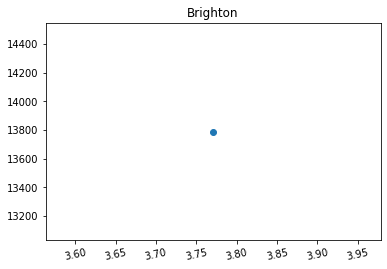

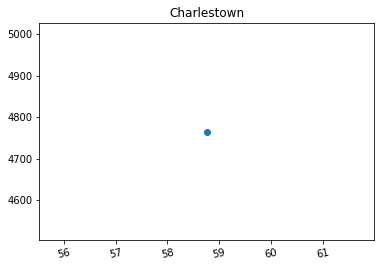

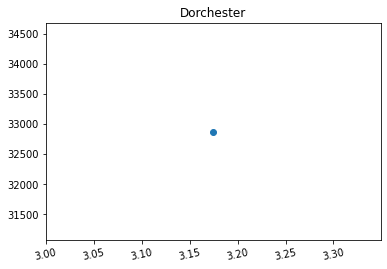

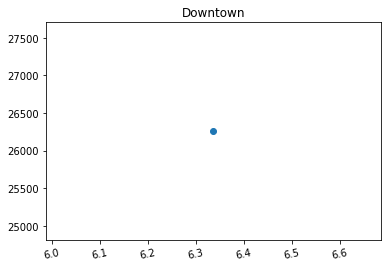

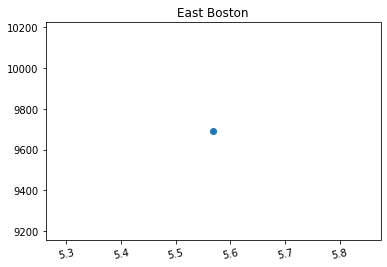

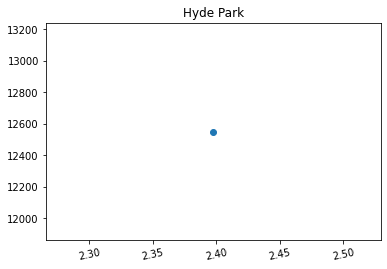

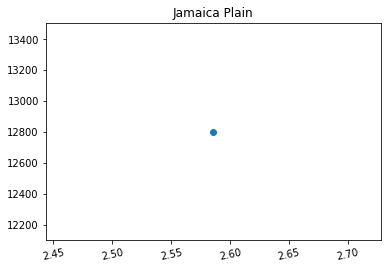

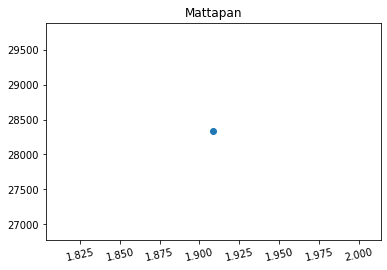

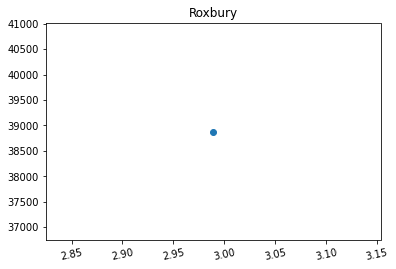

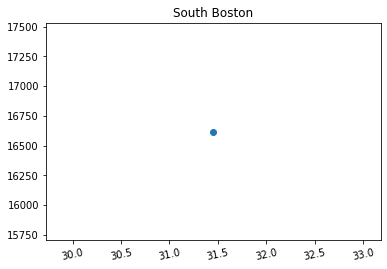

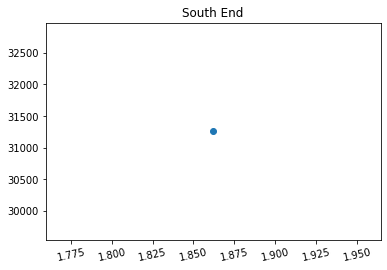

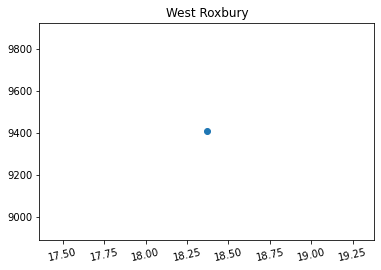

In [20]:
"""for name in distances_vs_counts['NAME'].unique():
    tmp = distances_vs_counts[distances_vs_counts['NAME']==name]
    plt.scatter(tmp['DIST'], tmp['INCIDENT_NUMBER'])
    #plt.ylim(0,17000)
    plt.xticks(rotation=12)
    plt.title(name)"""

Text(0.5, 1.0, 'Criminality regarding distance')

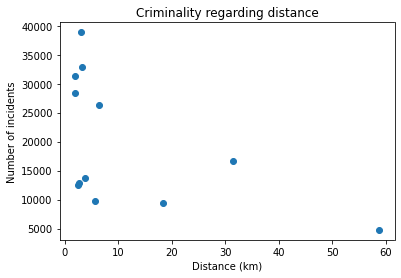

In [26]:
plt.scatter(distances_vs_counts['DIST'], distances_vs_counts['INCIDENT_NUMBER'])
plt.xlabel("Distance (km)")
plt.ylabel("Number of incidents")
plt.title('Criminality regarding distance')